<a href="https://colab.research.google.com/github/hyeokjun0804/HJ_BigData_Maketing_Course/blob/main/%EC%9E%AC%EA%B0%80%EC%9A%94%EC%96%91%EC%8B%9C%EC%84%A4%EB%A1%9C_%EC%9A%94%EC%96%91%EC%8B%9C%EC%84%A4%EC%9D%98_%EC%88%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#재가요양시설로 요양시설의 수 예측

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#구글 드라이브 마운트

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


판다스 함수 호출 및 데이터 로드, 한글 인코딩

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv file/2022년_9월_시군구별_장기요양기관_현황.csv")
df

# 판다스 불러오고 csv파일을 한글 인코딩하고 df에 입력

,시도,노인요양시설,공동생활가정,방문요양,방문목욕,방문간호,주야간보호,단기보호,복지용구
0,서울특별시,5.0,3.0,92.0,71.0,9.0,17.0,NaN,18.0
1,서울특별시,9.0,13.0,111.0,102.0,4.0,19.0,NaN,20.0
2,서울특별시,8.0,23.0,96.0,81.0,6.0,22.0,4.0,9.0
3,서울특별시,20.0,14.0,185.0,144.0,10.0,31.0,NaN,30.0
4,서울특별시,10.0,19.0,120.0,103.0,9.0,26.0,NaN,13.0
...,...,...,...,...,...,...,...,...,...
246,경상남도,9.0,NaN,25.0,19.0,NaN,12.0,NaN,NaN
247,경상남도,6.0,NaN,23.0,13.0,1.0,7.0,NaN,4.0
248,제주특별자치도,19.0,2.0,24.0,19.0,1.0,20.0,NaN,4.0
249,제주특별자치도,42.0,8.0,84.0,64.0,8.0,48.0,NaN,24.0


기술통계 및 null값 확인과 제거

In [3]:
df.info()

# df 정보 불러오기기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      250 non-null    object 
 1   노인요양시설  250 non-null    float64
 2   공동생활가정  221 non-null    float64
 3   방문요양    250 non-null    float64
 4   방문목욕    248 non-null    float64
 5   방문간호    200 non-null    float64
 6   주야간보호   248 non-null    float64
 7   단기보호    78 non-null     float64
 8   복지용구    239 non-null    float64
dtypes: float64(8), object(1)
memory usage: 17.8+ KB


In [4]:
df.isnull().sum()

# df null값 확인

시도          1
노인요양시설      1
공동생활가정     30
방문요양        1
방문목욕        3
방문간호       51
주야간보호       3
단기보호      173
복지용구       12
dtype: int64

In [5]:
df.fillna(0, inplace = True)

# df null값 삭제

In [6]:
df.isnull().sum()

# df null값 삭제됐는지 확인

시도        0
노인요양시설    0
공동생활가정    0
방문요양      0
방문목욕      0
방문간호      0
주야간보호     0
단기보호      0
복지용구      0
dtype: int64

In [7]:
df['노인요양시설_공동생활'] = df['노인요양시설'] + df['공동생활가정'] 

In [8]:
df.describe()

# df 기술통계

,노인요양시설,공동생활가정,방문요양,방문목욕,방문간호,주야간보호,단기보호,복지용구,노인요양시설_공동생활
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,17.179283,7.143426,66.350598,46.498008,3.250996,19.972112,0.533865,7.860558,24.322709
std,18.422479,8.694098,47.418357,36.394217,3.171868,15.046435,1.204097,6.745701,25.482925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,29.000000,19.000000,1.000000,8.500000,0.000000,2.000000,8.000000
50%,11.000000,4.000000,55.000000,35.000000,2.000000,17.000000,0.000000,6.000000,18.000000
75%,21.000000,9.000000,92.000000,66.500000,5.000000,27.500000,1.000000,12.000000,30.500000
max,129.000000,55.000000,236.000000,199.000000,16.000000,88.000000,10.000000,38.000000,184.000000


박스플롯으로 이상치 확인

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa73ee9c7c0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fa73ee0a460>, <matplotlib.lines.Line2D object at 0x7fa73ee0a7c0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fa73ee0ab20>, <matplotlib.lines.Line2D object at 0x7fa73ee0ae80>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fa73ee0a100>], 'medians': [<matplotlib.lines.Line2D object at 0x7fa73ee18220>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fa73ee18520>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_

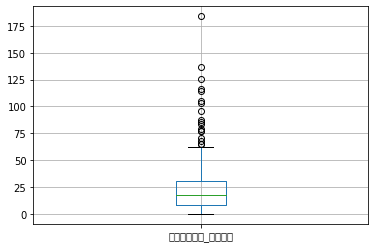

In [9]:
df.boxplot(column="노인요양시설_공동생활", return_type="both")
#boxplot: 최솟값,Q1(lower), Q2(중앙값), Q3(upper), 최댓값
#통계를 낼 때 평균이나 표준편차를 많이 사용하는데 데이터에 이상치가 있으면 왜곡된 의미 전달 가능성 높음
#이상치가 있는지 확인하기 위해 박스플롯을 활용하여 이상치가 얼마나 포함되어 있는지 판단

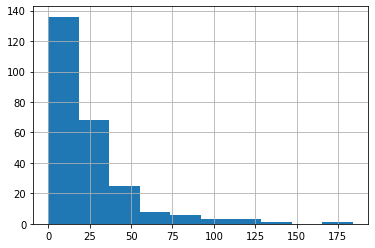

In [10]:
df["노인요양시설_공동생활"].hist() #hist는 막대그래프

In [11]:
df.groupby

<bound method DataFrame.groupby of           시도  노인요양시설  공동생활가정   방문요양   방문목욕  방문간호  주야간보호  단기보호  복지용구  \
0      서울특별시     5.0     3.0   92.0   71.0   9.0   17.0   0.0  18.0   
1      서울특별시     9.0    13.0  111.0  102.0   4.0   19.0   0.0  20.0   
2      서울특별시     8.0    23.0   96.0   81.0   6.0   22.0   4.0   9.0   
3      서울특별시    20.0    14.0  185.0  144.0  10.0   31.0   0.0  30.0   
4      서울특별시    10.0    19.0  120.0  103.0   9.0   26.0   0.0  13.0   
..       ...     ...     ...    ...    ...   ...    ...   ...   ...   
246     경상남도     9.0     0.0   25.0   19.0   0.0   12.0   0.0   0.0   
247     경상남도     6.0     0.0   23.0   13.0   1.0    7.0   0.0   4.0   
248  제주특별자치도    19.0     2.0   24.0   19.0   1.0   20.0   0.0   4.0   
249  제주특별자치도    42.0     8.0   84.0   64.0   8.0   48.0   0.0  24.0   
250        0     0.0     0.0    0.0    0.0   0.0    0.0   0.0   0.0   

     노인요양시설_공동생활  
0            8.0  
1           22.0  
2           31.0  
3           34.0  
4           29.0 

In [12]:
!sudo apt-get install -y fonts-nanum #폰트 다운로드 리눅스 명령어
!sudo fc-cache -f -vv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic') #폰트 지정

#회귀분석모델 돌려보기

In [17]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

로그 씌워서 정규분포 모양으로 만들었습니다.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


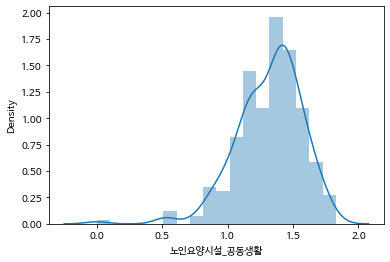

In [18]:
import numpy as np

df["노인요양시설_공동생활"] = np.log1p(df["노인요양시설_공동생활"])
sns.distplot(df["노인요양시설_공동생활"])

#knn 모델

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
# 변수선택
X = df[['방문요양', '방문목욕', '주야간보호','복지용구']]
Y = df["노인요양시설_공동생활"]

In [21]:
#numeric value(Y)

import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train  = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2, p=1)
#p : int, default=2
#Power parameter for the Minkowski metric. When p = 1, 
#this is equivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance 

knn_reg.fit(X_train, Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

accuracy: 0.794
RMSE: 0.196


선형회귀

In [22]:
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression()

# 학습
model.fit(X, Y)

# 예측
print(model.predict(X))

[1.34425137 1.42190414 1.38796402 1.56866372 1.46015641 1.31015776
 1.37358414 1.24493073 1.5242454  1.51356276 1.46010883 1.30706982
 1.32584285 1.31428207 1.24395737 1.23814018 1.42597808 1.42421621
 1.51351131 1.34422105 1.18941294 1.4912327  1.14513458 1.16411697
 1.48987136 1.16574612 1.32295467 1.27360282 1.24743844 1.17707833
 1.34874657 1.30748425 1.34647681 1.23433027 1.34939022 1.13389369
 1.19873001 1.26635424 1.18913831 1.14872832 1.40873393 1.34388416
 1.78739991 1.34748349 1.71341933 1.68850239 1.3573603  1.49120098
 1.19849525 1.16787248 1.43057674 1.78312079 1.16078976 1.51980888
 1.50750777 1.63240812 1.41693059 1.08391868 1.24428753 1.53850242
 1.31848874 1.20679223 1.73721977 1.32868332 1.30788932 1.42919839
 1.6637789  1.43500685 1.61399953 1.39534664 1.18449889 1.29380651
 1.37333902 1.33506093 1.28367531 1.23346044 1.58805418 1.38891044
 1.41905377 1.12759161 1.2848682  1.48002467 1.30725848 1.31353601
 1.48247415 2.09829338 1.24755456 1.89075418 1.41935485 1.3067

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("train R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

predict value
 [1.42895146 1.08999112 1.22471576 1.38907543 1.15026529 1.14107243
 1.54088343 1.29285693 1.34886879 1.43034783 1.25688672 1.3479577
 1.27050756 1.35398054 1.74871977 1.33307652 1.12766834 1.50876253
 1.42792583 1.25914641 1.18232996 1.70331723 1.30609433 1.27909539
 1.14289585 1.21741711 1.49213558 1.60282605 1.18006282 1.26155761
 1.15017258 1.56685307 1.71236851 1.5758256  1.45757603 1.11725064
 1.62229303 1.30413706 1.14963586 1.08163362 1.10830784 1.31547876
 1.36475242 1.26278245 1.2910569  1.35779833 1.12170945 1.70635975
 1.28385374 1.15042661 1.28236595 1.50638376 1.26257899 1.22478288
 1.53651682 1.49530709 1.27247138 1.49168731 1.18041641 1.22570411
 1.10235291 1.28768282 1.23055239 1.13856852 1.20152121 1.18921504
 1.24008485 1.14717142 1.40968416 1.35505476 1.35276037 1.22633651
 1.11725064 1.39619055 1.0916313  1.41390897]
train R2 : 0.468
train R2 : 0.544
RMSE: 0.152
절편 1.307
가중치(beta) [-0.039  0.062  0.138  0.032]


#머신러닝, 딥러닝 모델 돌려보기

In [24]:
from matplotlib import pyplot as plt
#matplotlib: 정적, 애니메이션 및 대화형 시각화를 생성하기 위한 포괄적인 라이브러리
#pyplot:matplotlib가 MATLAB처럼 작동하도록 하는 함수 모음
from pandas import DataFrame
#pandas:오픈 소스 데이터 분석 및 조작 도구
#DataFrame:행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있으며 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구
import numpy as np
#numpy:행렬/배열 처리 및 연산
from pandas import *

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# 트레인셋 나누는 것과 칼럼트랜스포머, 스케일러 모듈 불러오기

In [26]:
df.columns

# 칼럼 확인해보기

Index(['시도', '노인요양시설', '공동생활가정', '방문요양', '방문목욕', '방문간호', '주야간보호', '단기보호',
       '복지용구', '노인요양시설_공동생활'],
      dtype='object')

In [27]:
import numpy as np

#1. 변수선택
X = df[['방문요양', '방문목욕', '주야간보호','복지용구']]
Y = df["노인요양시설_공동생활"]

#2. train = test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 데이터 전처리(preprocessing)
ct = ColumnTransformer([("scaling", StandardScaler(), ['방문요양', '방문목욕', '주야간보호','복지용구'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [28]:
#4. 모델링
from sklearn.neural_network import MLPRegressor

#4-1. 모델 생성
MLP_Reg_model = MLPRegressor(random_state=0, alpha=1, max_iter=1000, hidden_layer_sizes=[50, 50])
                            
#5. 모형학습 및 예측
MLP_Reg_model.fit(X_train, Y_train)
Y_pred = MLP_Reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value: \n", Y_pred)
print("tain accuracy : {:.3f}".format(MLP_Reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:3f}".format(rmse))

Y predict value: 
 [1.49467372 0.94676946 1.16643824 1.44964706 1.08293052 1.08838088
 1.54574922 1.35739158 1.37175197 1.48316938 1.3549634  1.40727471
 1.26425832 1.36727496 1.63096321 1.40598533 1.06232781 1.53057742
 1.43447431 1.21339746 1.2368743  1.54532948 1.38201795 1.2440728
 1.08384865 1.17762351 1.51391287 1.57477524 1.21569802 1.22784982
 1.11733893 1.55906896 1.58056225 1.47251811 1.48635665 1.04634946
 1.51881662 1.23996885 1.11660709 0.93299643 0.99491152 1.31395404
 1.4343528  1.2300434  1.3189706  1.40860644 1.03058362 1.57110987
 1.3745875  1.10946472 1.4061381  1.53102977 1.34841849 1.27428092
 1.5028811  1.52381259 1.33039153 1.51557499 1.11662728 1.27187122
 1.01203249 1.33626599 1.25813874 1.09933749 1.1869327  1.27426061
 1.30697892 1.11255481 1.46915791 1.39288403 1.374268   1.23065404
 1.04634946 1.41642521 0.99097044 1.48459887]
tain accuracy : 0.591
RMSE : 0.145829


In [29]:
Y_pred_df = pd.DataFrame(Y_pred)
Y_pred_df

,0
0,1.494674
1,0.946769
2,1.166438
3,1.449647
4,1.082931
...,...
71,1.230654
72,1.046349
73,1.416425
74,0.990970


In [30]:
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()
Y_test_df = pd.DataFrame(Y_test_df["노인요양시설_공동생활"])
Y_test_df

,노인요양시설_공동생활
0,1.408800
1,1.026672
2,1.162283
3,1.534194
4,1.194706
...,...
71,1.248441
72,1.026672
73,1.419607
74,1.026672


matplotlib로 예측값과 실제값을 비교해봤습니다.

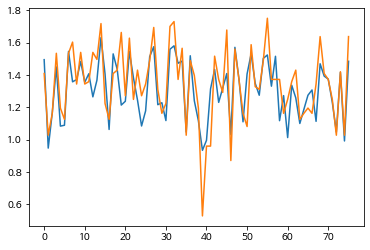

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(Y_pred_df)
plt.plot(Y_test_df)

#DNN(Deep learning : Deep Neural Network)

#회귀예측

In [32]:
import warnings
warnings.filterwarnings("ignore")

# 딥러닝 할 때 경고문이 잘 떠서 무시하는 모듈 소환

In [33]:
df.info()

# 예의상 정보 확인인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시도           251 non-null    object 
 1   노인요양시설       251 non-null    float64
 2   공동생활가정       251 non-null    float64
 3   방문요양         251 non-null    float64
 4   방문목욕         251 non-null    float64
 5   방문간호         251 non-null    float64
 6   주야간보호        251 non-null    float64
 7   단기보호         251 non-null    float64
 8   복지용구         251 non-null    float64
 9   노인요양시설_공동생활  251 non-null    float64
dtypes: float64(9), object(1)
memory usage: 19.7+ KB


In [51]:
import keras
import tensorflow as tf

#1. 변수선택
X = df[['방문요양', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설_공동생활'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#4. seed 값 설정
np.random.seed(0)
tf.random.set_seed(0)

#5. 모형생성
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_dim=4, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))

#6. 모형 학습
model.compile(loss = "mse", optimizer = "SGD") # 확률적 경사 하강법(SGD): 
Y_pred = np.round(model.predict(X_test[:4], verbose=0),3)
print("Y predict value \n", Y_pred)

#7. 모형 평가
train_score = model.evaluate(X_train, Y_train,verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("train mse: {:.3f}".format(train_score))
print("test mse: {:.3f}".format(test_score))

Y predict value 
 [[0.    0.026 0.031 0.    0.    0.151 0.033 0.    0.097 0.    0.037 0.012
  0.    0.003 0.059 0.025 0.012 0.    0.    0.019 0.002 0.045 0.04  0.017
  0.075 0.034 0.    0.027 0.03  0.    0.153 0.    0.    0.065 0.    0.
  0.    0.    0.    0.    0.045 0.106 0.    0.    0.    0.    0.    0.027
  0.183 0.032 0.09  0.037 0.    0.    0.    0.    0.    0.04  0.    0.
  0.136 0.    0.091 0.064]
 [0.    0.    0.044 0.113 0.    0.    0.    0.    0.118 0.    0.023 0.214
  0.009 0.    0.369 0.073 0.132 0.121 0.227 0.    0.    0.    0.394 0.09
  0.    0.    0.    0.066 0.    0.    0.261 0.    0.    0.074 0.    0.114
  0.    0.    0.    0.123 0.07  0.    0.062 0.    0.    0.    0.    0.032
  0.    0.148 0.124 0.081 0.    0.437 0.013 0.    0.239 0.396 0.055 0.686
  0.    0.    0.341 0.   ]
 [0.    0.    0.027 0.001 0.    0.    0.034 0.052 0.049 0.    0.048 0.036
  0.    0.    0.079 0.    0.06  0.096 0.082 0.    0.    0.    0.145 0.031
  0.    0.    0.    0.    0.    0.    0.081 0. 

train mse와 test mse 확인

#앙상블

회귀예측

In [50]:
#1. 변수선택
X = df[['방문요양', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설_공동생활'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#4. 단일 모형 생성
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

svr = SVR()
mlp = MLPRegressor(random_state=0)

#5. voting model 생성
model = VotingRegressor(estimators = [("SVR", svr), ("MLP", mlp)])

#6. 모형학습
model.fit(X_train, Y_train)

#7. 예측 및 모형 성능 평가
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
#8-1. 보팅모형 정확도
print("voting regressor accuracy(R2) : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2. 개별모형 정확도
Regressors = [svr, mlp]
for Regressor in Regressors :
  Regressor.fit(X_train, Y_train)
  Regressor.fit(X_train, Y_train)
  class_name = Regressor.__class__.__name__
  print("{0} accuracy : {1:3f}".format(class_name, Regressor.score(X_test, Y_test)))

Y predict value: 
 [0.92981177 0.68846255 0.71292506 0.86305732 0.74902477 0.73645955
 0.88374332 0.76837547 0.93528142 0.88049376 0.83071696 0.82532312
 0.74050273 0.83399269 0.86392749 0.81500444 0.72265792 0.89882994
 0.85124643 0.74182012 0.76576974 0.89517694 0.80237716 0.72867731
 0.72357953 0.7201605  0.94821678 0.91337939 0.74791456 0.75511493
 0.72365772 0.88991879 0.93237566 0.88082047 0.91180953 0.71058336
 0.93064305 0.81069842 0.72781346 0.68333802 0.70772246 0.80601538
 0.80843696 0.76937169 0.75788728 0.80916273 0.70836294 0.89866902
 0.77371008 0.73362239 0.8556374  0.87208223 0.82019368 0.853345
 0.8701102  0.87128959 0.76468194 0.89548266 0.76341657 0.76865838
 0.70890088 0.78014617 0.75679917 0.71764521 0.7868707  0.78659852
 0.78982098 0.73495945 0.84460425 0.8968286  0.79825703 0.73007454
 0.71058336 0.88262196 0.70168289 0.86348959]
voting regressor accuracy(R2) : 0.213
SVR accuracy : 0.445230
MLPRegressor accuracy : -0.343482


정확도가 전반적으로 잘 안나오고 MLP accuracy는 완전 이상합니다.

#그래디언트 회귀예측

In [47]:
#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#4. 모형생성
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, max_depth = 4, learning_rate = 0.1)

#5. 모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value: \n", Y_pred)
print("accuracy(test) : {:.3f}".format(model.score(X_test, Y_test)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value: 
 [2.96635661 1.14141028 1.55827149 2.78586798 1.89854368 1.67173043
 3.63064489 2.60257952 2.22655563 3.59093524 2.51803315 2.69498081
 2.84824581 2.94566406 4.476637   2.50408479 1.817101   2.86166619
 3.2887348  2.30723112 2.09574679 3.35817902 2.33186198 2.82661254
 1.82226512 2.56594593 2.80006864 2.9746615  2.31732533 2.88299246
 1.65190757 3.33021538 3.8052392  2.63995469 3.51837023 1.60591991
 3.1137194  2.58057668 1.42309032 1.46686793 1.58480278 2.39436579
 3.26672915 1.98511518 2.41586876 2.88830005 1.63477406 3.35648626
 2.10334696 1.9330971  2.76110919 3.57431824 1.96237436 2.2847439
 2.39295853 3.32437439 1.80875402 2.89354316 1.45365305 2.29112066
 1.89069318 2.39783474 2.59356763 1.95692837 2.48977413 2.36265218
 2.34981178 1.96851923 3.40466339 2.69633016 2.97533564 2.44028448
 1.53118629 2.64549758 1.50323202 2.87054003]
accuracy(test) : 0.470
RMSE : 0.6066085393813206


#랜덤포레스트

회귀예측

In [48]:
#1. 변수선택
X = df[['방문요양', '공동생활가정', '방문목욕', '주야간보호','복지용구']]
Y = np.log1p(df['노인요양시설'])

#2. train - test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#3 데이터 전처러(preprocessing)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#4. 모형 생성
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 4)

#5. 모형 예측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n",Y_pred)
print("accuracy(R2) : {:.3f}".format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [3.01762161 1.26789911 1.65401795 2.86885313 1.77811664 1.7083349
 3.17049311 2.76298176 2.43712301 3.17885407 2.6368241  2.67271626
 2.77983946 2.91764769 4.04333058 2.51787431 1.70679544 2.95942056
 3.00213946 2.39845947 1.93594362 3.62211744 2.57188922 2.77983946
 1.76388307 2.49537415 3.0738455  3.01901963 2.43348309 2.58730399
 1.70142154 3.14673998 3.53411482 3.01858555 3.17065792 1.63370981
 2.89337138 2.44682476 1.67677987 1.45883398 1.57149197 2.41047644
 3.01657435 2.15334218 2.50129853 3.01626251 1.65144215 3.21803071
 2.67905858 1.99940854 2.72716558 3.17473621 2.46574497 2.56847383
 2.6558051  3.1735813  2.42510718 2.83055405 1.76091896 2.59264466
 1.8421255  2.63423521 2.71816214 2.05426485 2.33896862 2.17738445
 2.37253456 2.02823862 3.17911305 2.72259812 2.8309033  2.50968424
 1.69081877 2.7394311  1.51071257 3.06586889]
accuracy(R2) : 0.796
RMSE : 0.5634398162296441


회귀모델 예측 정확도를 나타내는 R2 accuracy와 실제값과 예측값 사이의 오차를 나타내는 RMSE 모두 만족할만한 수치가 나왔습니다.

랜덤포레스트 채택

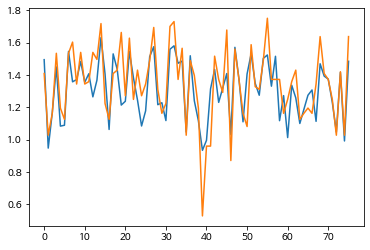

In [49]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(Y_pred_df)
plt.plot(Y_test_df)